(cap-likelihood)=
# La verosimiglianza 

La verosimiglianza viene utilizzata sia nell'inferenza bayesiana che in quella frequentista. In entrambi i paradigmi di inferenza, il suo ruolo è quello di quantificare la forza con la quale i dati osservati supportano i possibili valori dei parametri sconosciuti di un modello statistico.

## La funzione di verosimiglianza

La *funzione di verosimiglianza* $\mathcal{L}(\theta \mid y) = f(y \mid \theta), \theta \in \Theta,$ è la funzione di massa o di densità di probabilità dei dati $y$ vista come una funzione del parametro sconosciuto (o dei parametri sconosciuti) $\theta$.

Detto in altre parole, la funzione di verosimiglianza e la funzione di (massa o densità di) probabilità sono formalmente identiche, ma è completamente diversa la loro interpretazione:

-   nel caso della funzione di massa o di densità di probabilità, la distribuzione del vettore casuale delle osservazioni campionarie $y$ dipende dai valori assunti dal parametro (o dai parametri) $\theta$ -- per esempio, nel caso della distribuzione binomiale, fissata $\theta$ (probabilità di successo) a 0.5, la probabilità di osservare $y = 0, \dots, 10$ successi in $n$ prove è determinata in maniera univoca (se il valore del parametro $\theta$ è noto, quello che resta da stabilire è la probabilità da assegnare a ciascuno degli esiti $y$ possibili);
-   nel caso della la funzione di verosimiglianza la credibilità assegnata a ciascun possibile valore $\theta$ viene determinata avendo acquisita l'informazione campionaria $y$ che rappresenta l'elemento condizionante (in questo secondo caso, $y$ è noto, ma $\theta$ è ignoto; ci chiediamo quale sia la credibilità relativa di ciascuno dei possibili valori $\theta$, avendo osservato un determinato $y$).

La funzione di verosimiglianza descrive dunque in termini relativi il sostegno empirico che $\theta \in \Theta$ riceve da $y$. Infatti, la funzione di verosimiglianza assume forme diverse al variare di $y$. Possiamo dunque pensare alla funzione di verosimiglianza come alla risposta alla seguente domanda: avendo osservato i dati $y$, quanto risultano (relativamente) credibili i diversi valori del parametro $\theta$? In termini più formali possiamo dire che, sulla base dei dati, $\theta_1 \in \Theta$ risulta più credibile di $\theta_2 \in \Theta$ quale indice del modello probabilistico generatore dei dati se $\mathcal{L}(\theta_1) > \mathcal{L}(\theta_1)$.

Si noti un punto importante: la funzione $\mathcal{L}(\theta \mid y)$ non è una funzione di densità. Infatti, essa non racchiude un'area unitaria.

## Modello binomiale

Per chiarire il concetto di verosimiglianza consideriamo innanzitutto il caso più semplice, ovvero quello Binomiale.

Per $n$ prove Bernoulliane indipendenti, le quali producono $y$ successi e ($n-y$) insuccessi, la funzione nucleo di verosimiglianza (ovvero, la funzione di verosimiglianza da cui sono state escluse tutte le costanti moltiplicative che non hanno alcun effetto su $\hat{\theta}$) è

$$
\mathcal{L}(p \mid y) = \theta^y (1-\theta)^{n - y}.\notag
$$ (eq-like-binomial-kernel)

Per fare un esempio pratico, consideriamo la ricerca di {cite}`zetsche_2019future`. Questi ricercatori hanno trovato che, su 30 pazienti clinicamente depressi, 23 manifestavano delle aspettative distorsione negativamente relativamente al loro umore futuro. Se i dati di {cite}`zetsche_2019future` vengono riassunti mediante una proporzione (ovvero, 23/30), allora è sensato adottare un modello probabilistico binomiale quale meccanismo generatore dei dati:

$$
y  \sim Bin(n, \theta),
$$ (eq-binomialmodel)

laddove $\theta$ è la probabiltà che una prova Bernoulliana assuma il valore 1 e $n$ corrisponde al numero di prove Bernoulliane. Questo modello assume che le prove Bernoulliane $y$ che costituiscono il campione siano tra loro indipendenti e che ciascuna abbia la stessa probabilità $\theta \in [0, 1]$ di essere un "successo" (valore 1). In altre parole, il modello generatore dei dati avrà la seguente funzione di massa di probabilità

$$
p(y \mid \theta)
\ = \
Bin(y \mid n, \theta).
$$

Nei capitoli precedenti è stato mostrato come, sulla base del modello binomiale, sia possibile assegnare una probabilità a ciascun possibile valore $y \in \{0, 1, \dots, n\}$ *assumendo noto il valore del parametro* $\theta$. Ma ora abbiamo il problema inverso, ovvero quello di fare inferenza su $\theta$ alla luce dei dati campionari $y$. In altre parole, riteniamo di conoscere il modello probabilistico che ha generato i dati, ma di tale modello non conosciamo i parametri: vogliamo dunque ottenere informazioni su $\theta$ avendo osservato i dati $y$. Per fare questo, in un ottica bayesiana, è innanzitutto necessario definire la funzione di verosimiglianza.

Per i dati di {cite}`zetsche_2019future`, la funzione di verosimiglianza corrisponde alla funzione binomiale di parametro $\theta \in [0, 1]$ sconosciuto. Abbiamo osservato $y$ = 23 successi, in $n$ = 30 prove.

In [17]:
n = 30
y = 23

La funzione di verosimiglianza dunque diventa

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} \theta^{23} + (1-\theta)^7.
$$ (eq-likebino23)

Per costruire la funzione di verosimiglianza dobbiamo applicare l'eq. {eq}`eq-likebino23` tante volte, cambiando ogni volta il valore $\theta$, ma tenendo sempre costante il valore dei dati. Nella seguente simulazione considereremo 100 possibili valori $\theta \in [0, 1]$.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math
import arviz as az
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

theta = np.linspace(0.0, 1.0, num=100)
print(theta)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

Per esempio, ponendo $\theta = 0.1$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.1^{23} + (1-0.1)^7.
$$

In [19]:
binom.pmf(23, 30, 0.1)

9.7371682902e-18

Ponendo $\theta = 0.2$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.2^{23} + (1-0.2)^7.
$$

In [20]:
binom.pmf(23, 30, 0.2)

3.58141723492221e-11

Se ripetiamo questo processo 100 volte, una volta per ciascuno dei valori $\theta$ considerati, otteniamo 100 coppie di punti $\theta$ e $f(\theta)$.

In [21]:
def like(n, r, theta):
  return math.comb(n, r) * theta**r * (1-theta)**(n-r)

La curva che interpola tali punti è la funzione di verosimiglianza. La figura successiva fornisce una rappresentazione grafica di tale funzione.

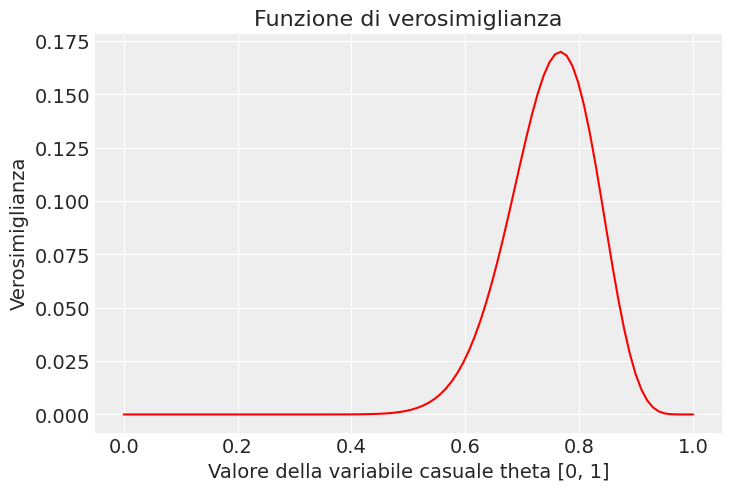

In [22]:
n = 30
r = 23
plt.plot(theta, like(n=n, r=r, theta=theta), 'r-')
plt.title('Funzione di verosimiglianza', fontsize=16)
plt.xlabel('Valore della variabile casuale theta [0, 1]', fontsize=14)
plt.ylabel('Verosimiglianza', fontsize=14)
plt.show()


### Interpretazione

Come possiamo interpretare la curva che abbiamo ottenuto? Per alcuni valori $\theta$ la funzione di verosimiglianza assume valori piccoli; per altri valori $\theta$ la funzione di verosimiglianza assume valori più grandi. Questi ultimi sono i valori $\theta$ più credibili e il valore 23/30 = 0.767 (la moda della funzione di verosimiglianza) è il valore più credibile di tutti.

In [23]:
input_list = like(n=n, r=r, theta=theta)
max = input_list[0]
index = 0
for i in range(1,len(input_list)):
    if input_list[i] > max:
        max = input_list[i]
        index = i
print(f'Index of the maximum value is : {index}')

Index of the maximum value is : 76


In [24]:
theta[76]

0.7676767676767677

Si noti che, anziché usare la funzione `like()` che (per chiarezza) abbiamo definito sopra, in una maniera del tutto equivalente è possibile usare la funzione `binom.pmf()`.

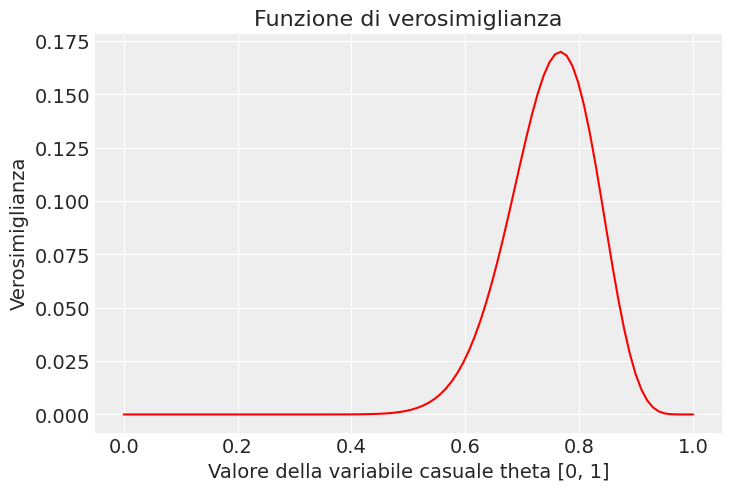

In [25]:
n = 30
r = 23
plt.plot(theta,  binom.pmf(r, n, theta), 'r-')
plt.title('Funzione di verosimiglianza', fontsize=16)
plt.xlabel('Valore della variabile casuale theta [0, 1]', fontsize=14)
plt.ylabel('Verosimiglianza', fontsize=14)
plt.show()

### La log-verosimiglianza

Dal punto di vista pratico risulta più conveniente utilizzare, al posto della funzione di verosimiglianza, il suo logaritmo naturale, ovvero la funzione di log-verosimiglianza:

$$
\ell(\theta) = \log \mathcal{L}(\theta).
$$ (eq-loglike-definition)

Poiché il logaritmo è una funzione strettamente crescente (usualmente si considera il logaritmo naturale), allora $\mathcal{L}(\theta)$ e $\ell(\theta)$ assumono il massimo (o i punti di massimo) in corrispondenza degli stessi valori di $\theta$:

$$
\hat{\theta} = argmax_{\theta \in \Theta} \ell(\theta) = argmax_{\theta \in \Theta} \mathcal{L}(\theta).
$$

Per le proprietà del logaritmo, la funzione nucleo di log-verosimiglianza della binomiale è

$$
\begin{aligned}
\ell(\theta \mid y) &= \log \mathcal{L}(\theta \mid y) \notag\\
          &= \log \left(\theta^y (1-\theta)^{n - y} \right) \notag\\
          &= \log \theta^y + \log \left( (1-\theta)^{n - y} \right) \notag\\
          &= y \log \theta + (n - y) \log (1-\theta).\notag
\end{aligned}
$$

Si noti che non è necessario lavorare con i logaritmi, ma è fortemente consigliato. Il motivo è che i valori della verosimiglianza, in cui si moltiplicano valori di probabilità molto piccoli, possono diventare estremamente piccoli -- qualcosa come $10^{-34}$. In tali circostanze, non è sorprendente che i programmi dei computer mostrino problemi di arrotondamento numerico. Le trasformazioni logaritmiche risolvono questo problema.

Svolgiamo nuovamente il problema precedente usando la log-verosimiglianza per trovare il massimo della funzione di log-verosimiglianza. Ora utilizziamo la funzione `binom.logpmf()`.

La funzione di log-verosimiglianza è rappresentata nella figura successiva.

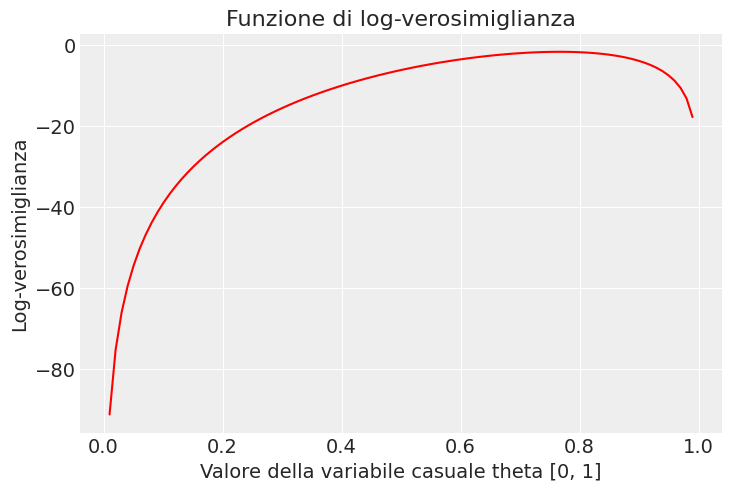

In [26]:
n = 30
r = 23
plt.plot(theta, binom.logpmf(r, n, theta), 'r-')
plt.title('Funzione di log-verosimiglianza', fontsize=16)
plt.xlabel('Valore della variabile casuale theta [0, 1]', fontsize=14)
plt.ylabel('Log-verosimiglianza', fontsize=14)
plt.show()

Il risultato replica quello trovato in precedenza con la funzione di verosimiglianza.


In [27]:
input_list = binom.logpmf(r, n, theta)


In [28]:
max = input_list[0]
index = 0
for i in range(1,len(input_list)):
    if input_list[i] > max:
        max = input_list[i]
        index = i
print(f'Index of the maximum value is : {index}')

Index of the maximum value is : 76


In [29]:
theta[index]


0.7676767676767677

## Modello gaussiano

Ora che abbiamo capito come costruire la funzione verosimiglianza di una binomiale è relativamente semplice fare un passo ulteriore e considerare la verosimiglianza del caso di una funzione di densità, ovvero nel caso di una variabile casuale continua. Consideriamo qui il caso della Normale. La densità di una distribuzione Normale di parametri $\mu$ e $\sigma$ è

$$
f(y \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left\{-\frac{1}{2\sigma^2}(y-\mu)^2\right\}.
$$ (eq-gaussian-sim-like)

Costruiamo dunque la funzione di verosimiglianza nel caso dell'equazione {eq}`eq-gaussian-sim-like`.

### Una singola osservazione

Esaminiamo prima il caso in cui i dati corrispondono ad una singola osservazione $y$. Poniamo


In [30]:
y = 114

L'equazione {eq}`eq-gaussian-sim-like` dipende dai parametri $\mu$ e $\sigma$ e dai dati $y$. Per semplicità, ipotizziamo $\sigma$ noto e uguale a 15. Nell'esercizio considereremo 1000 valori $\mu$ compresi tra 70 e 160.

In [31]:
mu = np.linspace(70.0, 160.0, num=1000)



Dato che consideriamo 1000 possibili valori $\mu$, per costruire la funzione di verosimiglianza applicheremo 1000 volte l'eq. {eq}`eq-gaussian-sim-like`. In ciascun passo dell'esercizio inseriremo nell'@eq-gaussian-sim-like

-   il singolo valore $y$ considerato (che viene mantenuto costante),
-   il valore $\sigma$ assunto noto (anch'esso costante),
-   uno alla volta ciascuno dei valori $\mu$ che abbiamo definito sopra (quindi, nelle 1000 applicazioni dell'eq. {eq}`eq-gaussian-sim-like`, il valore $\mu$ è l'unico che varia: $y$ e $\sigma$ sono mantenuti costanti).

La distribuzione Gaussiana è implementata in Python mediante `norm.pdf()`. La funzione `norm.pdf()` richiede tre argomenti: il valore $y$ (o il vettore $y$), la media, ovvero il parametro $\mu$, e la deviazione standard, ovvero il parametro $\sigma$.

Applicando la funzione `norm.pdf()` 1000 volte, una volta per ciascuno dei valori $\mu$ che abbiamo definito (e tenendo fissi $y = 114$ e $\sigma = 15$), otteniamo 1000 valori $f(\mu)$.

In [32]:
from scipy.stats import norm

f_mu = norm.pdf(y, loc=mu, scale=15)

La funzione di verosimiglianza è la curva che interpola i punti $\big(\mu, f(\mu)\big)$.

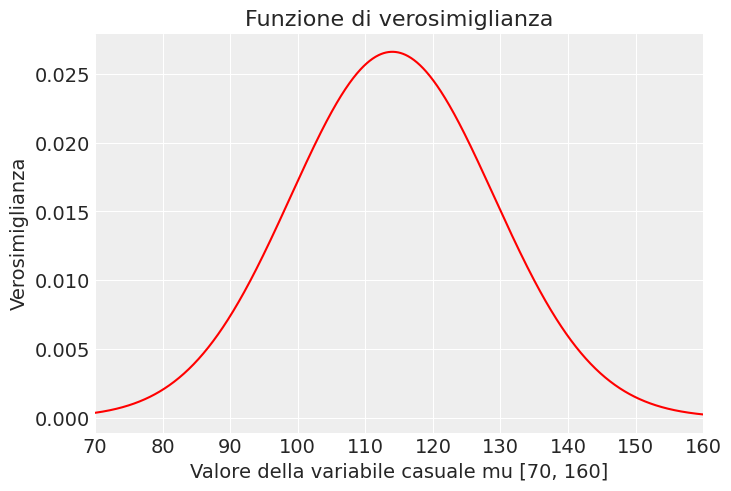

In [33]:
plt.plot(mu, f_mu, 'r-')
plt.title('Funzione di verosimiglianza', fontsize=16)
plt.xlabel('Valore della variabile casuale mu [70, 160]', fontsize=14)
plt.ylabel('Verosimiglianza', fontsize=14)
plt.xlim([70, 160])
plt.show()

La funzione di verosimiglianza così trovata ha la forma della distribuzione Gaussiana. Nel caso di una singola osservazione, *ma solo in questo caso*, ha anche un'area unitaria. Per l'esempio presente, la moda della funzione di verosimiglianza è 114.

### Un campione di osservazioni

Consideriamo ora il caso più generale, ovvero quello di un campione di $n$ osservazioni. Possiamo immaginare un campione casuale $y_1, y_2, \dots, y_n$ estratto da una popolazione $\mathcal{N}(\mu, \sigma)$ come una sequenza di realizzazioni indipendenti ed identicamente distribuite (di seguito, i.i.d.) della medesima variabile casuale $Y \sim \mathcal{N}(\mu, \sigma)$. I parametri sconosciuti sono $\theta = \{\mu, \sigma\}$.

Se le variabili casuali $y_1, y_2, \dots, y_n$ sono i.i.d., la loro densità congiunta è data da: 

$$
\begin{align}
f(y \mid \theta) &= f(y_1 \mid \theta) \cdot f(y_2 \mid \theta) \cdot \; \dots \; \cdot f(y_n \mid \theta)\notag\\
                 &= \prod_{i=1}^n f(y_i \mid \theta),
\end{align}
$$

laddove $f(\cdot)$ è la densità Gaussiana di parametri $\mu, \sigma$. Tenendo costanti i dati $y$, la funzione di verosimiglianza diventa:

$$
\begin{equation}
\mathcal{L}(\theta \mid y) = \prod_{i=1}^n f(y_i \mid \theta).
\end{equation}
$$

Per chiarire la formula precedente, consideriamo un esempio che utilizza come dati i valori BDI-II dei trenta soggetti del campione clinico di {cite}`zetsche_2019future`. 

In [34]:
y = [26, 35, 30, 25, 44, 30, 33, 43, 22, 43, 24, 19, 39, 31, 25, 28, 35, 30, 26, 
    31, 41, 36, 26, 35, 33, 28, 27, 34, 27, 22]

Ci poniamo l'obiettivo di creare la funzione di verosimiglianza per questi dati, supponendo di sapere (in base ai risultati di ricerche precedenti) che i punteggi BDI-II si distribuiscono secondo la legge Normale e supponendo $\sigma$ noto e uguale alla deviazione standard del campione.

In [35]:
true_sigma = np.std(y)
true_sigma 

6.495810615739622

Abbiamo visto in precedenza che, per una singola osservazione, la funzione di verosimiglianza è la densità Gaussiana espressa in funzione dei parametri (in questo caso, solo $\mu$). Per un campione di osservazioni i.i.d., ovvero $y = (y_1, y_2, \dots, y_n)$, la verosimiglianza è la funzione di densità congiunta $f(y \mid \mu, \sigma)$ espressa in funzione dei parametri. Dato che le osservazioni sono i.i.d., la densità congiunta è data dal prodotto delle densità delle singole osservazioni.

Poniamoci il problema di trovare l'ordinata della funzione di log-verosimiglianza per le 30 osservazioni del campione in corrispondenza di $\mu = \mu_0$

Per la prima osservazione del campione ($y_1 = 26$) abbiamo

$$
f(26 \mid \mu_0, \sigma=6.50) = \frac{1}{{6.50 \sqrt {2\pi}}}\exp\left\{{-\frac{(26 - \mu_0)^2}{2\cdot 6.50^2}}\right\}.
$$

Se consideriamo tutte le osservazioni, la densità congiunta è data dal prodotto delle densità delle singole osservazioni: $f(y \mid \mu, \sigma = 6.50) = \, \prod_{i=1}^n f(y_i \mid \mu, \sigma = 6.50)$. Utilizzando i dati del campione, e assumendo $\sigma = 6.50$, l'ordinata della funzione di verosimiglianza in corrispondenza di $\mu_0$ è uguale a

$$
\begin{aligned}
\mathcal{L}(\mu_0, \sigma=6.50 \mid y) =& \, \prod_{i=1}^{30} f(y_i \mid \mu_0, \sigma = 6.50) = \notag\\
& \frac{1}{{6.50 \sqrt {2\pi}}}\exp\left\{{-\frac{(26 - \mu_0)^2}{2\cdot 6.50^2}}\right\} \times \notag\\
 & \frac{1}{{6.61 \sqrt {2\pi}}}\exp\left\{{-\frac{(35 - \mu_0)^2}{2\cdot 6.50^2}}\right\} \times  \notag\\
& \vdots \notag\\
 & \frac{1}{{6.61 \sqrt {2\pi}}}\exp\left\{{-\frac{(22 - \mu_0)^2}{2\cdot 6.50^2}}\right\}.
\end{aligned}
$$

È più conveniente svolgere i calcoli usando il logaritmo della verosimiglianza. In Python definiamo la funzione di log-verosimiglianza, `log_likelihood()`, che prende come argomenti `y`, `mu` e `sigma = 6.50`.

In [36]:
def log_likelihood(y, mu, sigma = true_sigma):
    return np.sum(norm.logpdf(y, loc=mu, scale=15))

Consideriamo il valore $\mu_0 = \bar{y}$, ovvero


In [37]:
bar_y = np.mean(y)
print(bar_y)

30.933333333333334


L'ordinata della funzione di log-verosimiglianza in corrispondenza di $\mu = 30.93$ è


In [38]:
print(log_likelihood(y, 30.93, sigma = true_sigma))

-111.62269980698424


Troviamo ora i valori della log-verosimiglianza per ciascuno dei 1000 valori $\mu$ nell'intervallo $[\bar{y} - 2 \sigma, \bar{y} + 2 \sigma]$. Iniziamo a definire `mu`.


In [39]:
mu = np.linspace(np.mean(y) - 2*np.std(y), np.mean(y) + 2*np.std(y), num=100)

Troviamo il valore dell'ordinata della funzione di log-verosimiglianza in corrispondenza di ciascuno dei 1000 valori `mu` che abbiamo definito.

In [40]:
ll = [log_likelihood(y, mu_val, true_sigma) for mu_val in mu]

Nel caso di un solo parametro sconosciuto (nel caso presente, $\mu$) è possibile rappresentare la log-verosimiglianza con una curva che interpola i punti (`mu`, `ll`). Tale funzione descrive la *credibilità relativa* che può essere attribuita ai valori del parametro $\mu$ alla luce dei dati osservati.

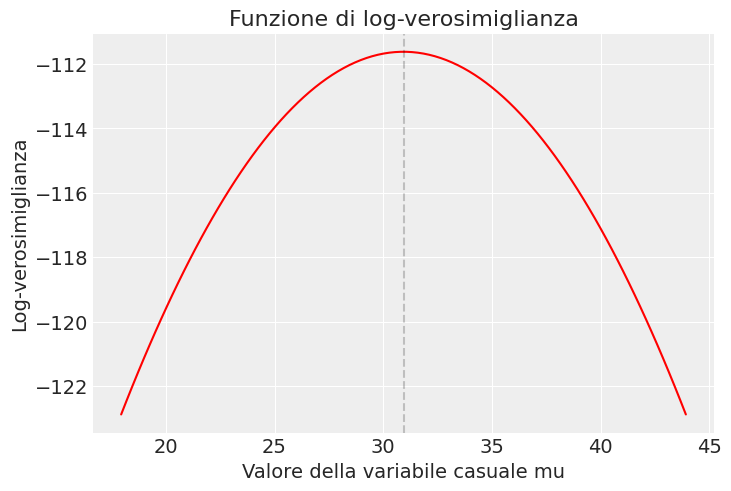

In [41]:
plt.plot(mu, ll, 'r-')
plt.title('Funzione di log-verosimiglianza', fontsize=16)
plt.xlabel('Valore della variabile casuale mu', fontsize=14)
plt.ylabel('Log-verosimiglianza', fontsize=14)
plt.axvline(x=np.mean(y), color='k', alpha=0.2, ls='--')
plt.show()

### Massima verosimiglianza

Il valore $\mu$ più credibile corrisponde al massimo della funzione di log-verosimiglinza e viene detto *stima di massima verosimiglianza*.

Il massimo della funzione di log-verosimiglianza, ovvero 30.93 nel caso dell'esempio presente, è identico alla media dei dati campionari. Tale risultato, ottenuto per via numerica, può essere dimostrato formalmente (ma non lo faremo qui). Usando la notazione matematica possiamo dire che cerchiamo l'argmax dell'equazione precedente rispetto a $\theta$, ovvero

$$
\hat{\theta} = \text{argmax}_{\theta} \prod_{i=1}^n f(y_i \mid \theta).
$$

Questo problema si risolve calcolando le derivate della funzione rispetto a $\theta$, ponendo le derivate uguali a zero e risolvendo. Saltando tutti i passaggi algebrici di questo procedimento, per $\mu$ si trova

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n y_i
$$

e

$$
\hat{\sigma} = \sqrt{\sum_{i=1}^n\frac{1}{n}(y_i- \mu)^2}.
$$

In altri termini, la s.m.v. del parametro $\mu$ è la media del campione e la s.m.v. del parametro $\sigma$ è la deviazione standard del campione. Il massimo della funzione di log-verosimiglianza calcolata per via numerica, ovvero 30.93, è identico alla media dei dati campionari e corrisponde al risultato teorico atteso.


## Commenti e considerazioni finali 

Nella funzione di verosimiglianza i dati (osservati) vengono trattati come fissi, mentre i valori del parametro (o dei parametri) $\theta$ vengono variati: la verosimiglianza è una funzione di $\theta$ per il dato fisso $y$. Pertanto, la funzione di verosimiglianza riassume i seguenti elementi: un modello statistico che genera stocasticamente i dati (in questo capitolo abbiamo esaminato due modelli statistici: quello binomiale e quello Normale), un intervallo di valori possibili per $\theta$ e i dati osservati $y$.

Nella statistica frequentista l'inferenza si basa solo sui dati a disposizione e qualunque informazione fornita dalle conoscenze precedenti non viene presa in considerazione. Nello specifico, nella statistica frequentista l'inferenza viene condotta massimizzando la funzione di (log) verosimiglianza, condizionatamente ai valori assunti dalle variabili casuali campionarie. Le basi dell'inferenza frequentista, dunque, sono state riassunte in questo Capitolo. Nella statistica bayesiana, invece, l'inferenza statistica viene condotta combinando la funzione di verosimiglianza con le distribuzioni a priori dei parametri incogniti $\theta$. Ciò verrà discusso nei Capitoli successivi.

La differenza fondamentale tra inferenza bayesiana e frequentista è dunque che i frequentisti non ritengono utile descrivere i parametri in termini probabilistici: i parametri dei modelli statistici vengono concepiti come fissi ma sconosciuti. Nell'inferenza bayesiana, invece, i parametri sconosciuti sono intesi come delle variabili casuali e ciò consente di quantificare in termini probabilistici il nostro grado di intertezza relativamente al loro valore.